# Project 1 | 13th November 2020 | LetsUpgrade | Pranav Shinde

So, where are we droppin' boys and girls?
Battle Royale-style video games have taken the world by storm. 100 players are dropped onto an island
empty-handed and must explore, scavenge, and eliminate other players until only one is left standing, all
while the play zone continues to shrink.

PlayerUnknown's BattleGrounds (PUBG) has enjoyed massive popularity. With over 50 million copies
sold, it's the fifth best selling game of all time, and has millions of active monthly players.


The team at PUBG has made official game data available for the public to explore and scavenge outside
of "The Blue Circle." This competition is not an official or affiliated PUBG site - Kaggle collected data made
possible through the PUBG Developer API.



You are given over 65,000 games' worth of anonymized player data, split into training and testing sets,
and asked to predict final placement from final in-game stats and initial player ratings.
What's the best strategy to win in PUBG? Should you sit in one spot and hide your way into victory, or do
you need to be the top shot? Let's let the data do the talking!


# 1. Read the dataset.

In [1]:
import pandas as pd
pubgg=pd.read_csv("pubg.csv")

In [2]:
pubgg

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2f262dd9795e60,78437bcd91d40e,d5db3a49eb2955,0,0,0.0,0,0,0,92,...,0,0.0,0,0.0,0,0,0.00,0,1470,0.0000
1,a32847cf5bf34b,85b7ce5a12e10b,65223f05c7fdb4,0,0,163.2,1,1,0,42,...,0,0.0,0,0.0,0,0,132.70,2,1531,0.2222
2,1b1900a9990396,edf80d6523380a,1cadec4534f30a,0,3,278.7,2,1,8,16,...,3,0.0,0,0.0,0,0,3591.00,10,0,0.8571
3,f589dd03b60bf2,804ab5e5585558,c4a5676dc91604,0,0,191.9,1,0,0,31,...,0,0.0,0,0.0,0,0,332.70,3,0,0.3462
4,c23c4cc5b78b35,b3e2cd169ed920,cd595700a01bfa,0,0,100.0,1,0,0,87,...,0,0.0,0,0.0,0,0,252.70,3,1557,0.0690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ef4f474acd8e85,2eca2a8391f75d,492ecdfae90b46,0,3,204.5,1,0,0,17,...,3,0.0,0,0.0,0,0,1648.00,4,1471,0.8333
9996,cf0bf82fb4d80e,2eaf2765f93adb,14bffd71e96320,0,0,0.0,0,0,0,49,...,0,0.0,0,0.0,0,0,897.10,6,1500,0.7174
9997,a0a31a0b1dcbe1,8d50c64ccc5071,147e4bbb62e3bb,0,0,0.0,0,0,0,83,...,0,0.0,0,0.0,0,0,188.20,2,1434,0.2083
9998,f6874657399d69,d31843d7e62ccb,662567dcf280f5,0,0,0.0,0,0,0,82,...,0,0.0,0,0.0,0,0,108.10,5,1534,0.2449


# 2. Check the datatype of all the columns.

In [4]:
pubgg.dtypes

Id                  object
groupId             object
matchId             object
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
matchDuration        int64
matchType           object
maxPlace             int64
numGroups            int64
rankPoints           int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object

# 3. Find the summary of all the numerical columns and write your findings about it.


In [5]:
pubgg.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.0000,10000.000000
mean,0.234600,1.088500,129.211264,0.64400,0.221700,1.354000,47.663100,506.970200,0.913400,0.543800,...,0.160200,600.693584,0.004200,4.385917,0.024400,0.007700,1130.008410,3.63590,609.3440,0.469926
std,0.575149,1.703279,167.193945,1.09562,0.577046,2.629102,27.424146,627.297959,1.524117,0.701948,...,0.454045,1524.915601,0.074719,30.889620,0.171486,0.089674,1168.597983,2.42209,739.7924,0.304508
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,151.575000,2.00000,0.0000,0.200000
50%,0.000000,0.000000,83.805000,0.00000,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,650.350000,3.00000,0.0000,0.458300
75%,0.000000,2.000000,185.325000,1.00000,0.000000,2.000000,71.000000,1169.000000,1.000000,1.000000,...,0.000000,0.000575,0.000000,0.000000,0.000000,0.000000,1923.250000,5.00000,1495.0000,0.735100
max,7.000000,18.000000,3469.000000,11.00000,14.000000,31.000000,100.000000,1926.000000,35.000000,4.000000,...,5.000000,28780.000000,3.000000,971.200000,3.000000,2.000000,10490.000000,41.00000,1863.0000,1.000000


# 4. The average person kills how many players?


In [6]:
average = pubgg[['kills']].mean()

In [7]:
average

kills    0.9134
dtype: float64

  Average Number of enemy players killed is 0.9134 i.e 1 (approxx)

# 5. 99% of people have how many kills?




# 6. The most kills ever recorded are how much?


In [8]:
maximum=pubgg.kills.max()
print(maximum)

35


The most kills ever recorded is 35 kills #op Gameplay


# 7. Print all the columns of the dataframe.


In [9]:
pubgg.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

# 8. Comment on distribution of the match's duration. Use seaborn.


In [10]:
import seaborn as sns

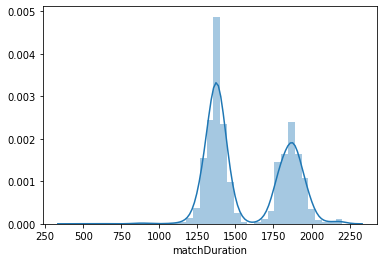

In [11]:
dur=sns.distplot(pubgg['matchDuration']);

In [12]:
pubgg.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

# 9. Comment on distribution of the walk distance. Use seaborn.


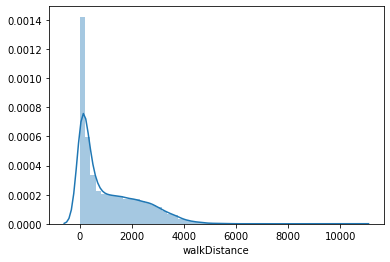

In [13]:
walk=sns.distplot(pubgg['walkDistance']);

# 10. Plot distribution of the match's duration vs walk distance one below the other.


Text(0, 0.5, 'Walk Distance')

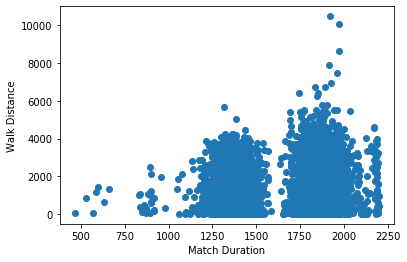

In [14]:
import matplotlib.pyplot as plt
plt.scatter(pubgg['matchDuration'],pubgg['walkDistance'])
plt.xlabel('Match Duration')
plt.ylabel('Walk Distance')

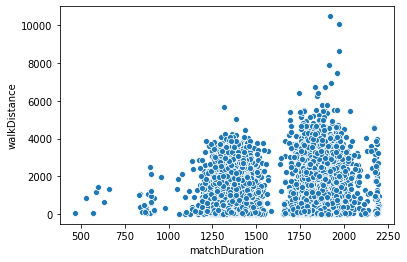

In [15]:
# By using Seaborn
sns.scatterplot(pubgg['matchDuration'],pubgg['walkDistance'])

In [16]:
# Or
lol = pubgg[['matchDuration','walkDistance']]
lol.head(10)

,matchDuration,walkDistance
0,1376,0.0
1,1370,132.7
2,1381,3591.0
3,1708,332.7
4,1807,252.7
5,1362,221.8
6,1369,3350.0
7,1349,417.6
8,1387,1959.0
9,1377,2794.0


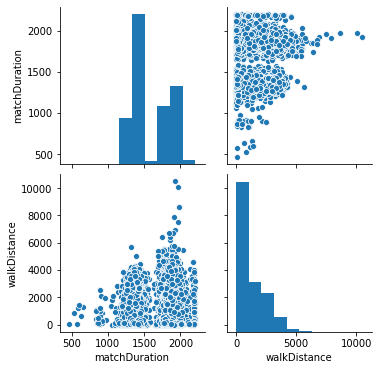

In [17]:
# Usind the Pairplot
pair=sns.pairplot(lol);

# 11. Plot distribution of the match's duration vs walk distance side by side.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000230BFF76A88>,
      dtype=object)

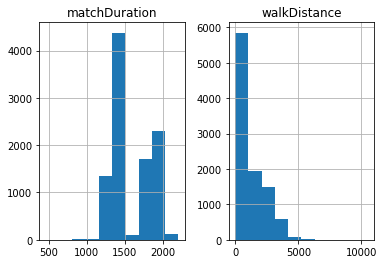

In [18]:
lol.hist()

# 12. Pairplot the dataframe. Comment on kills vs damage dealt, Comment on maxPlace vs numGroups.


In [19]:
pubgg.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [20]:
# Create subset of pubgg dataset having columns of interest
data = pubgg[['kills','damageDealt','maxPlace','numGroups']]
data.head(6)

,kills,damageDealt,maxPlace,numGroups
0,0,0.0,29,28
1,1,163.2,28,28
2,2,278.7,29,27
3,1,191.9,27,25
4,0,100.0,30,30
5,0,200.0,26,24


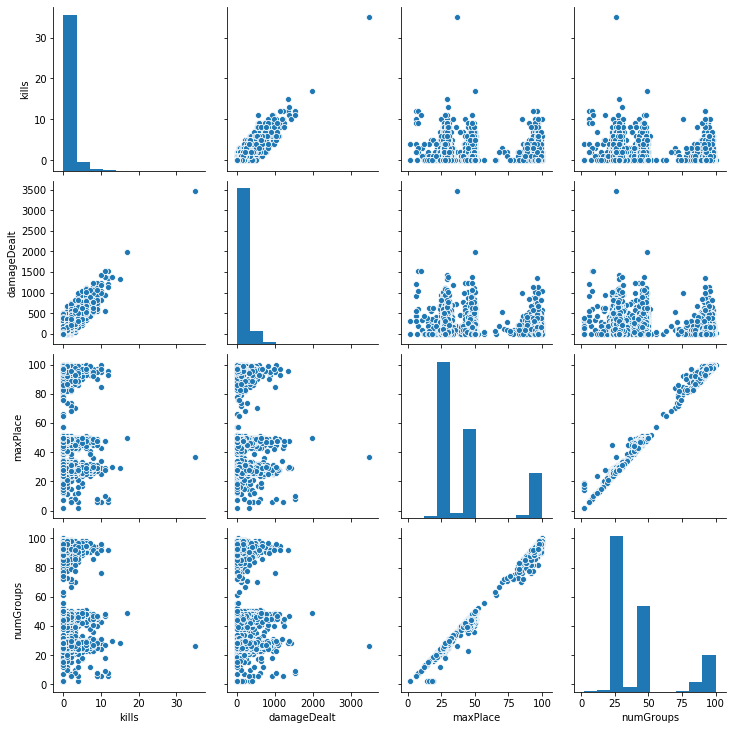

In [21]:
# Now plot the pairplot od data (subset of pubgg)
sns.pairplot(data);

# 13. How many unique values are there in 'matchType' and what are their counts?


In [22]:
# Unique values in Matchtype
uni = pubgg.matchType.unique()
print(uni)

['squad-fpp' 'squad' 'duo-fpp' 'solo-fpp' 'duo' 'solo' 'crashfpp'
 'flaretpp' 'normal-squad-fpp' 'normal-duo-fpp' 'flarefpp' 'normal-squad'
 'normal-solo-fpp' 'crashtpp']


In [23]:
# Their Count
pubgg['matchType'].describe()

count         10000
unique           14
top       squad-fpp
freq           3969
Name: matchType, dtype: object

In [24]:
# Count
pubgg['matchType'].value_counts()

squad-fpp           3969
duo-fpp             2282
squad               1359
solo-fpp            1234
duo                  702
solo                 386
normal-squad-fpp      24
crashfpp              13
normal-duo-fpp        13
normal-solo-fpp        8
normal-squad           4
flaretpp               3
crashtpp               2
flarefpp               1
Name: matchType, dtype: int64

# 14. Plot a barplot of ‘matchType’ vs 'killPoints'. Write your inferences.


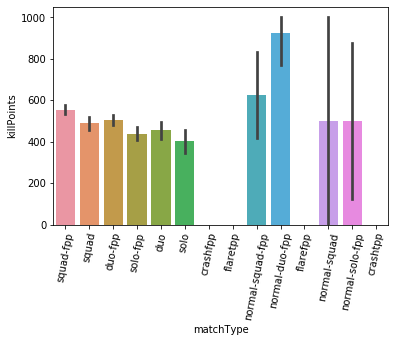

In [25]:
sns.barplot(x='matchType',y='killPoints',data=pubgg)
plt.xticks(rotation = 79);

# 15. Plot a barplot of ‘matchType’ vs ‘weaponsAcquired’. Write your inferences.


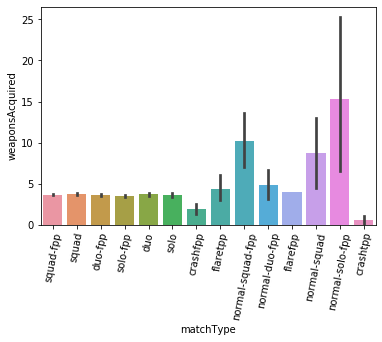

In [26]:
sns.barplot(x='matchType',y='weaponsAcquired',data=pubgg)
plt.xticks(rotation = 79);

# 16. Find the Categorical columns.


In [27]:
pubgg.dtypes

Id                  object
groupId             object
matchId             object
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
matchDuration        int64
matchType           object
maxPlace             int64
numGroups            int64
rankPoints           int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object

In [28]:
pubgg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               10000 non-null  object 
 1   groupId          10000 non-null  object 
 2   matchId          10000 non-null  object 
 3   assists          10000 non-null  int64  
 4   boosts           10000 non-null  int64  
 5   damageDealt      10000 non-null  float64
 6   DBNOs            10000 non-null  int64  
 7   headshotKills    10000 non-null  int64  
 8   heals            10000 non-null  int64  
 9   killPlace        10000 non-null  int64  
 10  killPoints       10000 non-null  int64  
 11  kills            10000 non-null  int64  
 12  killStreaks      10000 non-null  int64  
 13  longestKill      10000 non-null  float64
 14  matchDuration    10000 non-null  int64  
 15  matchType        10000 non-null  object 
 16  maxPlace         10000 non-null  int64  
 17  numGroups    

In [29]:
# Printing the categorical columns
df = pubgg.select_dtypes(include=['object'])
df

,Id,groupId,matchId,matchType
0,2f262dd9795e60,78437bcd91d40e,d5db3a49eb2955,squad-fpp
1,a32847cf5bf34b,85b7ce5a12e10b,65223f05c7fdb4,squad-fpp
2,1b1900a9990396,edf80d6523380a,1cadec4534f30a,squad-fpp
3,f589dd03b60bf2,804ab5e5585558,c4a5676dc91604,squad
4,c23c4cc5b78b35,b3e2cd169ed920,cd595700a01bfa,squad-fpp
...,...,...,...,...
9995,ef4f474acd8e85,2eca2a8391f75d,492ecdfae90b46,squad-fpp
9996,cf0bf82fb4d80e,2eaf2765f93adb,14bffd71e96320,duo-fpp
9997,a0a31a0b1dcbe1,8d50c64ccc5071,147e4bbb62e3bb,duo-fpp
9998,f6874657399d69,d31843d7e62ccb,662567dcf280f5,duo-fpp


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         10000 non-null  object
 1   groupId    10000 non-null  object
 2   matchId    10000 non-null  object
 3   matchType  10000 non-null  object
dtypes: object(4)
memory usage: 312.6+ KB


# 17. Plot a boxplot of ‘matchType’ vs ‘winPlacePerc’. Write your inferences.

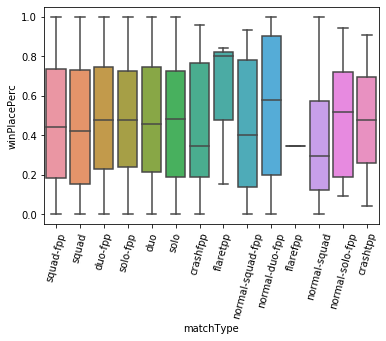

In [31]:
sns.boxplot(x='matchType',y='winPlacePerc',data=pubgg)
plt.xticks(rotation = 75);

# 18. Plot a boxplot of ‘matchType’ vs ‘matchDuration’. Write your inferences.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

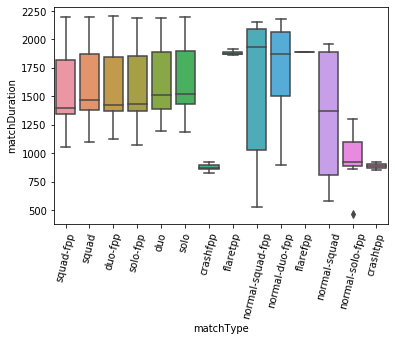

In [32]:
sns.boxplot(x='matchType',y='matchDuration',data=pubgg)
plt.xticks(rotation=76)

# 19. Change the orientation of the above plot to horizontal.


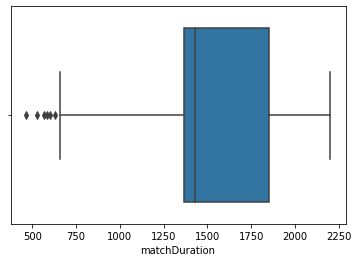

In [33]:
sns.boxplot(pubgg['matchDuration'])

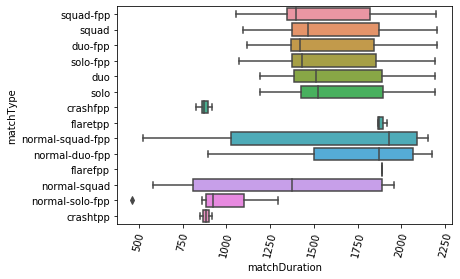

In [34]:
sns.boxplot(x='matchDuration',y='matchType',data=pubgg)
plt.xticks(rotation=76);

# 20. Add a new column called ‘KILL’ which contains the sum of following columns viz. headshotKills,teamKills, roadKills.



In [35]:
pubgg['KILL'] = pubgg.headshotKills + pubgg.teamKills + pubgg.roadKills

In [36]:
pubgg.head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,KILL
0,2f262dd9795e60,78437bcd91d40e,d5db3a49eb2955,0,0,0.00,0,0,0,92,...,0.0,0,0.0,0,0,0.0,0,1470,0.0000,0
1,a32847cf5bf34b,85b7ce5a12e10b,65223f05c7fdb4,0,0,163.20,1,1,0,42,...,0.0,0,0.0,0,0,132.7,2,1531,0.2222,1
2,1b1900a9990396,edf80d6523380a,1cadec4534f30a,0,3,278.70,2,1,8,16,...,0.0,0,0.0,0,0,3591.0,10,0,0.8571,1
3,f589dd03b60bf2,804ab5e5585558,c4a5676dc91604,0,0,191.90,1,0,0,31,...,0.0,0,0.0,0,0,332.7,3,0,0.3462,0
4,c23c4cc5b78b35,b3e2cd169ed920,cd595700a01bfa,0,0,100.00,1,0,0,87,...,0.0,0,0.0,0,0,252.7,3,1557,0.0690,0
5,fd034582dd4d2e,9b8930aeee086a,6f6e52b15ddf21,0,1,200.00,2,0,1,73,...,0.0,0,0.0,0,0,221.8,2,0,0.2000,0
6,c60b5633f4dcc8,7c0f817f6627c7,3232c1e0fec04b,0,3,638.20,4,1,1,1,...,0.0,0,0.0,0,0,3350.0,5,0,0.9333,1
7,f0ba8246b6980f,7318b5204462cb,112e9711f86001,0,0,27.94,0,0,0,66,...,0.0,0,0.0,0,0,417.6,4,0,0.3617,0
8,79c5d5eda1c72e,a85b81198dfc06,ef5fc25e28ffb1,1,4,275.80,3,0,4,10,...,1415.0,0,0.0,0,0,1959.0,4,0,0.6296,0
9,94834a28e52abd,bc513cde35fa54,f36a754a9b88f7,1,1,530.40,4,0,8,5,...,439.5,0,0.0,0,0,2794.0,5,1527,0.8462,0


New column has been created at the last named 'KILL' having the addition of headshotKills,teamKills, roadKills.


# 21. Round off column ‘winPlacePerc’ to 2 decimals.


In [37]:
pubgg.winPlacePerc = round( pubgg.winPlacePerc , 2)
fuxk =  pubgg.winPlacePerc
print(fuxk)

0       0.00
1       0.22
2       0.86
3       0.35
4       0.07
        ... 
9995    0.83
9996    0.72
9997    0.21
9998    0.24
9999    0.19
Name: winPlacePerc, Length: 10000, dtype: float64


In [38]:
pubgg.tail(6)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,KILL
9994,2cd3e844b34462,ea957f38343675,bb2a4179c006b0,0,0,0.0,0,0,0,82,...,0.0,0,0.0,0,0,98.68,1,1451,0.11,0
9995,ef4f474acd8e85,2eca2a8391f75d,492ecdfae90b46,0,3,204.5,1,0,0,17,...,0.0,0,0.0,0,0,1648.00,4,1471,0.83,0
9996,cf0bf82fb4d80e,2eaf2765f93adb,14bffd71e96320,0,0,0.0,0,0,0,49,...,0.0,0,0.0,0,0,897.10,6,1500,0.72,0
9997,a0a31a0b1dcbe1,8d50c64ccc5071,147e4bbb62e3bb,0,0,0.0,0,0,0,83,...,0.0,0,0.0,0,0,188.20,2,1434,0.21,0
9998,f6874657399d69,d31843d7e62ccb,662567dcf280f5,0,0,0.0,0,0,0,82,...,0.0,0,0.0,0,0,108.10,5,1534,0.24,0
9999,90359b0b8f8b0d,61d5b1bb8da43f,258bfa48d88014,0,0,0.0,0,0,0,78,...,0.0,0,0.0,0,0,53.36,1,0,0.19,0


The winPlacePerc column values are rounded off till 2 decimal places

# 22. Take a sample of size 50 from the column damageDealt for 100 times and calculate its mean. Plot it on a histogram and comment on its distribution.


In [15]:
fxck = pubgg['damageDealt'].sample(n = 50)


In [16]:
# Random 50 Values
fxck

9388     60.18
5428      0.00
3195     32.59
4829    297.60
4884    399.30
6826      0.00
3603     26.19
6757    174.80
3471    382.70
7596    267.60
9055    899.80
5065    100.00
5057    222.60
4370      0.00
7368    224.80
1503      0.00
797      58.80
7340    273.20
7300      0.00
3264     57.33
8100      0.00
3515     92.00
7363      0.00
1141    187.40
1065     83.81
9859    139.20
2140    101.70
9874     20.11
2257    198.40
456       0.00
3517      0.00
6805    100.00
5232    197.40
6558    400.40
1997      0.00
9606    452.60
7039    200.00
3929     95.84
633     300.00
7730     68.00
6182      0.00
6070    217.10
9811    654.90
7198    128.80
4181    300.00
8112    168.80
1880    236.40
6347    174.30
18       25.80
4839      0.00
Name: damageDealt, dtype: float64

In [11]:
fxck.mean()

131.34199999999998

In [13]:
# sample of size 50 from the column damageDealt for 100 times and calculate its mean.
for i in range (1,101):
    fxck = pubgg['damageDealt'].sample(n = 50)
    
    print('Mean for sample', i ,'having random 50 values :- ',fxck.mean() )
    

Mean for sample 1 having random 50 values :-  141.8092
Mean for sample 2 having random 50 values :-  117.73299999999998
Mean for sample 3 having random 50 values :-  155.3924
Mean for sample 4 having random 50 values :-  149.69580000000005
Mean for sample 5 having random 50 values :-  107.1068
Mean for sample 6 having random 50 values :-  172.51852
Mean for sample 7 having random 50 values :-  117.13140000000001
Mean for sample 8 having random 50 values :-  76.97436
Mean for sample 9 having random 50 values :-  141.54679999999996
Mean for sample 10 having random 50 values :-  113.25503999999997
Mean for sample 11 having random 50 values :-  139.99424000000002
Mean for sample 12 having random 50 values :-  131.11129999999997
Mean for sample 13 having random 50 values :-  82.50894
Mean for sample 14 having random 50 values :-  111.85760000000006
Mean for sample 15 having random 50 values :-  168.05179999999996
Mean for sample 16 having random 50 values :-  133.48180000000002
Mean for sam

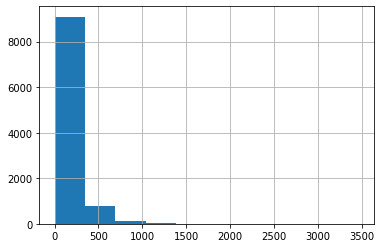

In [14]:
#Plot it on a histogram and comment on its distribution.

pubgg.damageDealt.hist()

# _______THANK YOU______:-)